# Kaggle Dog & Cat 분류
- label: (0 = cat, 1 = dog)
- 단순한 모델을 통해 분류 실시

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from PIL import Image
import os

import wandb

import torch
import torchvision
import torchvision.transforms as T
from torchsummary import summary

In [3]:
# seed 고정
import random
import torch.backends.cudnn as cudnn

def random_seed(seed_num):
    torch.manual_seed(seed_num)
    np.random.seed(seed_num)
    cudnn.benchmark = False
    cudnn.deterministic = True
    random.seed(seed_num)

random_seed(42)

In [4]:
wandb.login(key='')
run = wandb.init(project='flower_classifier', name='training')

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: greedjar74 (greedjar7498). Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /Users/kimhongseok/.netrc


# Data 확인

In [48]:
root_dir = './dogs-vs-cats/train'

last_num = 12499

cat_img_test = Image.open(os.path.join(root_dir, 'cat.0.jpg'))
dog_img_test = Image.open(os.path.join(root_dir, 'dog.0.jpg'))

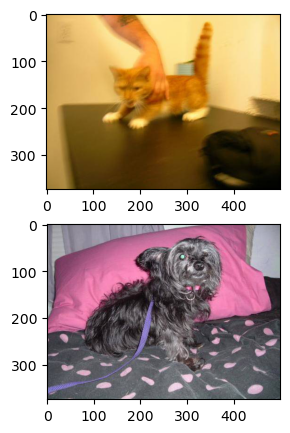

In [49]:
plt.figure(figsize=(5, 5))

plt.subplot(2, 1, 1)
plt.imshow(cat_img_test)
plt.subplot(2, 1, 2)
plt.imshow(dog_img_test)

## CustomDataset

In [50]:
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, root_dir, last_num, transforms):
        super().__init__()
        self.transforms = transforms
        self.data = list()
        self.classes = ['cat', 'dog']

        for label, cls in enumerate(self.classes):
            for i in range(last_num+1):
                self.data.append((os.path.join(root_dir, f'{cls}.{i}.jpg'), label))

    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        img_tmp = Image.open(self.data[idx][0])
        img = self.transforms(img_tmp)
        label = self.data[idx][1]

        return img, label

In [88]:
transforms = T.Compose([
    T.ToTensor(), 
    T.CenterCrop(300),
    T.Resize((224, 224))
])

train_dataset = CustomDataset(root_dir, last_num, transforms)

In [89]:
train_dataset[0][0].shape

torch.Size([3, 224, 224])

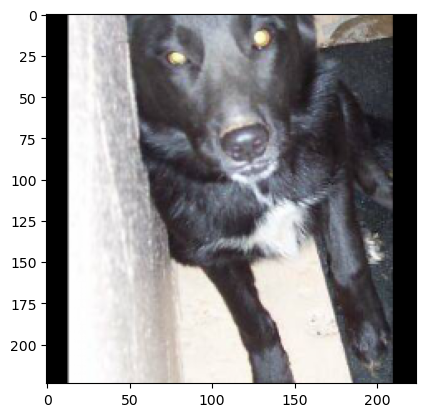

In [98]:
plt.imshow(np.array(train_dataset[22500][0].permute((1, 2, 0))))